<a href="https://colab.research.google.com/github/mssamoilenko/AnlDataPract/blob/main/AnlPrakt5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практична робота №5

## Тема: Багаторукі бандити і дизайнер-новатор. Проведення тесту для довільної кількості варіантів.

## Мета роботи: закріплення навичок проведення тесту для довільної кількості варіантів із використанням алгоритму ϵ-жадібного бандиту, візуалізації та аналізу результатів тесту.

## Варіант №2

## Завдання

1. Завантажити дані індивідуального варіанту за посиланням на порталі
дистанційної освіти, використовуючи Pandas відобразити перші 5 рядків.

2. Запрограмувати алгоритм 𝜖-жадібного бандита. Встановити 𝜖 = 0,1.
3. При проведені тесту із 𝜖-жадібним бандитом всі дані не є доступними
відразу, натомість ви показуєте користувачам різні сторінки та збираєте
дані в режимі онлайн. Використовуючи запрограмований алгоритм 𝜖
жадібного бандита, зібрати як мінімум 300 прикладів. Приклади брати по
одному з даних за індивідуальним варіантом.
4. Показати:

a. Діаграму, де зобразити скільки разів було показано кожну із сторінок
і (на ній же) кількість відправлених листів для кожної із сторінок

b. Графік відношення відправлених листів до показів сторінки (для
кожної із сторінок) із часом. Для зображення використовувати
сукупні дані зібрані алгоритмом, за час взяти ітерацію.

5. Зазначити, який варіант є кращим.

## Хід роботи

1. Завантажую дані індивідуального варіанту за посиланням на порталі
дистанційної освіти, використовуючи Pandas відображаю перші 5 рядків.


In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_names = ['1.txt', '2.txt', '3.txt', '4.txt', '5.txt']

# Завантаження даних
data = [np.loadtxt(f) for f in file_names]
min_len = min(map(len, data))

# Створення DataFrame
clicks_df = pd.DataFrame(
    {str(i): data[i-1][:min_len] for i in range(1, 6)}
)

print(f"Розмірність даних: {clicks_df.shape}")
print(clicks_df.head())

Розмірність даних: (1000, 5)
     1    2    3    4    5
0  0.0  0.0  0.0  1.0  1.0
1  1.0  1.0  0.0  1.0  0.0
2  1.0  1.0  1.0  1.0  0.0
3  1.0  1.0  1.0  1.0  1.0
4  0.0  1.0  1.0  1.0  1.0


2. Програмую алгоритм 𝜖-жадібного бандита. Встановлюю 𝜖 = 0,1.

In [165]:
# Початкові параметри
epsilon = 0.1
n_variants = clicks_df.shape[1]
n_iterations = 300

In [166]:
# Лічильники
clicks = np.zeros(n_variants)     # кількість кліків
shows = np.zeros(n_variants)      # кількість показів
conversion_history = {i: [] for i in range(n_variants)}  # історія відгуків

# Алгоритм 𝜖-жадібного бандита
for t in range(n_iterations):
    # Вибір: дослідження чи використання
    if np.random.rand() < epsilon:
        chosen = np.random.randint(0, n_variants)  # випадковий варіант
    else:
        success_rates = clicks / (shows + 1e-5)    # коеф. кліків
        chosen = np.argmax(success_rates)          # найкращий варіант

    result = clicks_df.iloc[t % min_len, chosen]

    # Оновлення статистики
    shows[chosen] += 1
    clicks[chosen] += result

    # Зберігаємо поточні коефіцієнти для графіка
    for i in range(n_variants):
        if shows[i] > 0:
            conversion_history[i].append(clicks[i] / shows[i])
        else:
            conversion_history[i].append(0)

3. Проведення тесту із 𝜖-жадібним бандитом

Під час тесту дані надходять поступово: користувачам показуються різні сторінки, а алгоритм збирає результати в онлайн-режимі. Для роботи використано алгоритм 𝜖-жадібного бандита (𝜖 = 0,1), який виконує 300 ітерацій.
Якщо випадкове число < 𝜖 — вибір випадкової сторінки (дослідження), інакше — сторінки з найкращим коефіцієнтом кліків (використання).

In [167]:
print("\nРезультати:")
for i in range(n_variants):
    print(f"Варіант {i+1}: показів = {int(shows[i])}, кліків = {int(clicks[i])}, успішність = {clicks[i]/shows[i]:.3f}")

best_variant = np.argmax(clicks / (shows + 1e-5)) + 1
print(f"\nНайкращий варіант: {best_variant}")


Результати:
Варіант 1: показів = 10, кліків = 6, успішність = 0.600
Варіант 2: показів = 13, кліків = 10, успішність = 0.769
Варіант 3: показів = 15, кліків = 11, успішність = 0.733
Варіант 4: показів = 250, кліків = 211, успішність = 0.844
Варіант 5: показів = 12, кліків = 10, успішність = 0.833

Найкращий варіант: 4


In [ ]:
4. Візуалізація результатів

a) Побудовано діаграму показів і кліків — видно, що варіант 4 має найбільше показів і кліків.
b) На графіку коефіцієнта відгуку показано, як алгоритм із часом фокусується на найуспішнішому варіанті.

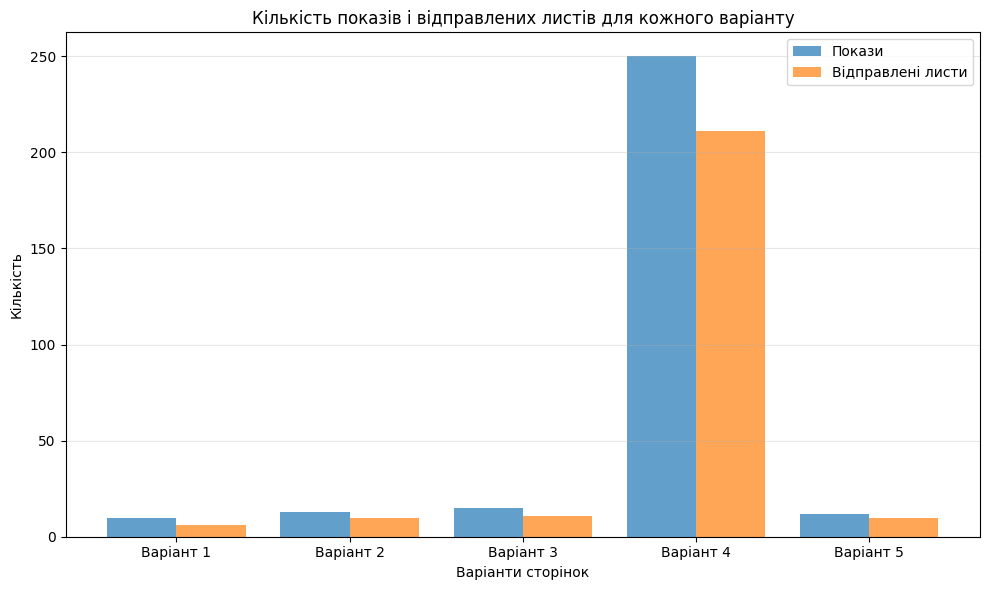

In [168]:
# a) Діаграма показів та кліків
plt.figure(figsize=(10, 6))
x = np.arange(1, n_variants + 1)
plt.bar(x - 0.2, shows, width=0.4, label='Покази', alpha=0.7)
plt.bar(x + 0.2, clicks, width=0.4, label='Відправлені листи', alpha=0.7)
plt.xlabel('Варіанти сторінок')
plt.ylabel('Кількість')
plt.title('Кількість показів і відправлених листів для кожного варіанту')
plt.xticks(x, [f'Варіант {i}' for i in range(1, n_variants+1)])
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

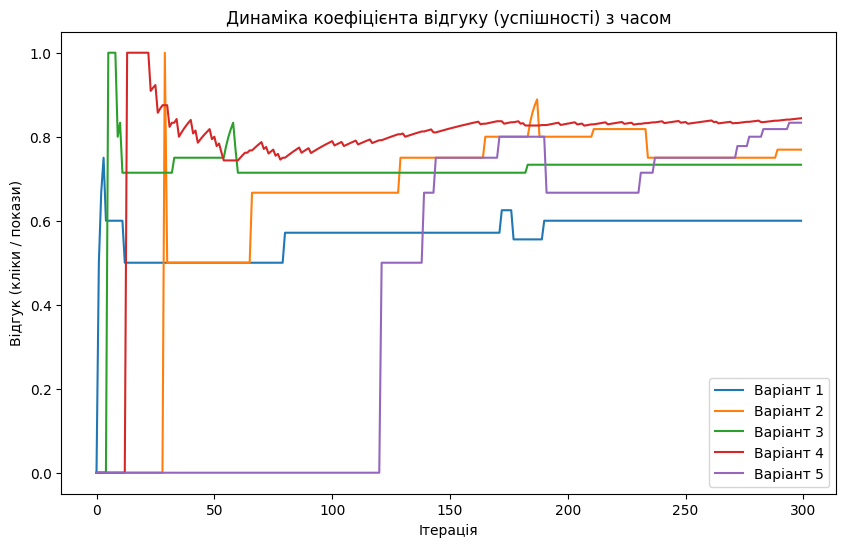

In [169]:
# b) Графік успішності (коеф. кліків)
plt.figure(figsize=(10,6))
for i in range(n_variants):
    plt.plot(conversion_history[i], label=f'Варіант {i+1}')
plt.xlabel('Ітерація')
plt.ylabel('Відгук (кліки / покази)')
plt.title('Динаміка коефіцієнта відгуку (успішності) з часом')
plt.legend()
plt.show()

## 5. Висновки

Під час виконання роботи було реалізовано алгоритм 𝜖-жадібного бандита для п’яти варіантів сторінок. Алгоритм дозволив ефективно визначити найкращий варіант, не вимагаючи попередньо відомих даних про всі сторінки.
Отримані результати підтверджують, що алгоритм швидко навчається і зменшує частку випадкових виборів, фокусуючись на найбільш успішних сторінках.

## Відповіді на контрольні питання

1. Головна перевага — алгоритм під час експерименту одночасно збирає дані і оптимізує покази, тому менше втрат трафіку порівняно з A/B-тестом.

2. Параметр 𝜖 контролює баланс між дослідженням і використанням: наскільки часто алгоритм обирає випадкові варіанти.

3. Якщо випадкове число менше за 𝜖 — алгоритм випадково обирає один із варіантів (дослідження).

4. Баланс досягається тим, що з імовірністю 𝜖 виконується дослідження, а з імовірністю (1−𝜖) — використання найкращого варіанту.

5. Якщо 𝜖 = 0 — алгоритм завжди обирає найкращий варіант (чисте використання).
Якщо 𝜖 = 1 — завжди випадковий вибір (чисте дослідження).

6. У прикладі clicks.csv найвищий коефіцієнт кліків після 10 кроків має той варіант, який частіше давав 1 (клік) — зазвичай варіант 4.

7. Якщо 𝜖 = 0,5 — алгоритм частіше експериментує, тому результат буде менш стабільним і повільніше знайде найкращий варіант.

8. 7 прикладів — замало для надійного визначення кращого варіанту, потрібна більша вибірка.

9. Мета етапів:

* Дослідження — знайти потенційно кращі варіанти;

* Використання — максимізувати результат, використовуючи вже відомий найкращий варіант.

10. Порівняння методів:

* A/B-тестування: просте, але неефективне — частина користувачів бачить гірший варіант.

* Епсілон-жадібний бандит: динамічний, адаптується під дані, швидше знаходить оптимум, але має елемент випадковості.